## Library Imports

In [61]:
from decouple import AutoConfig
import os
import pandas as pd
import matplotlib.pyplot as plt

## Functional Imports

In [62]:
from src.video.video_select import select_video
from src.video.video_insert import insert_multiple_video
from src.videos_manifest import list_files_in_directory
from src.video.youtube_video import *

### Load Manifest Data

In [63]:
videos_manifest_df = pd.read_csv('./../data/raw/raw_videos_manifest.csv')
videos_manifest_filenames = videos_manifest_df["filename"].to_numpy()
video_raw_directory = ".././data/raw/videos/"

## Configure PostgreSQL Environment Variables

In [64]:
config = AutoConfig(search_path='.')
db_params = {
    "host": "localhost",
    "port": config("DB_PORT"),
    "database": "YouTubeSentimentData",
    "user": config("DB_USER"),
    "password": config("DB_PASSWORD")
}

### Read Videos Query

In [67]:
all_videos = select_video(db_params)

Database connection is closed


### Insert Videos Query

In [66]:
insert_multiple_video(db_params, videos_manifest_filenames, video_raw_directory, return_all_video_section_data, parse_all_video_section_data)

Database connection is closed
Database connection is closed
Database connection is closed
Database connection is closed
Database connection is closed
Database connection is closed
Database connection is closed
Database connection is closed
Database connection is closed
Database connection is closed
Database connection is closed
Database connection is closed
Database connection is closed
Database connection is closed


### Convert Data to Pandas Dataframes

In [68]:
all_videos_df = pd.DataFrame(all_videos)
print(all_videos_df[1])

0    2023-09-19 12:00:34
1    2020-06-10 15:49:15
2    2023-05-16 16:18:56
3    2021-05-05 15:00:20
4    2016-09-20 21:27:59
5    2023-03-07 15:07:09
6    2018-12-12 09:26:01
7    2023-10-13 12:00:32
8    2022-06-10 18:19:05
9    2023-02-14 00:54:35
10   2022-06-04 16:32:07
11   2018-10-29 10:45:00
12   2020-07-29 13:48:00
13   2023-10-03 12:00:26
Name: 1, dtype: datetime64[ns]


### Add Upload Year Column

In [69]:
# Convert the "uploadDate" column to datetime format
all_videos_df["uploadDate"] = pd.to_datetime(all_videos_df[1])
all_videos_df["Year"] = all_videos_df["uploadDate"].dt.year

all_videos_df["uploadDate"]
all_videos_df["Year"]

0     2023
1     2020
2     2023
3     2021
4     2016
5     2023
6     2018
7     2023
8     2022
9     2023
10    2022
11    2018
12    2020
13    2023
Name: Year, dtype: int64

### Frequency of Year Upload Plot

<AxesSubplot: title={'center': 'Upload Frequency by Year'}, xlabel='Year', ylabel='Upload Frequency'>

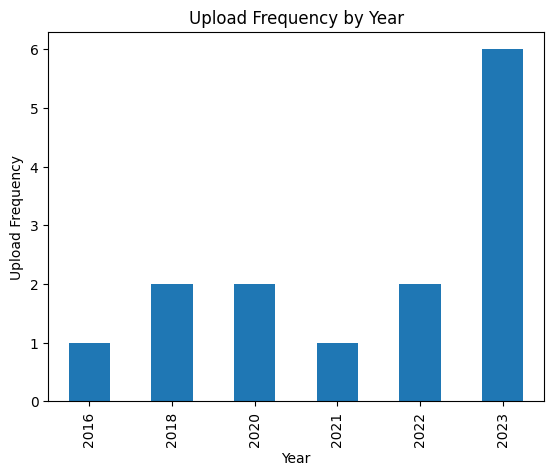

In [70]:
# Group the data by year and count the frequency of uploads
yearly_counts = all_videos_df["Year"].value_counts().sort_index()

# Plot the frequency of uploads by year
yearly_counts.plot(kind="bar", xlabel="Year", ylabel="Upload Frequency", title="Upload Frequency by Year")

In [ ]:
# FROM POSTGRES DATABASE
#tags_corpus = create_tags_corpus(db_params, "../sql/video/video_read_tags.SQL")
#print(tags_corpus)